# Fuzzykapal

# WaktuTempuh

In [3]:
#IMPORT
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

a. Rata – rata (avarage)

 Jarak tempuh paling minimal 1 jam dan paling besar 5 jam

 Waktu tempuh paling cepat 36 km dan paling lambat 30 km
    
   Kecepatan Kapal paling minimal 10 knot dan maksimal 32 knot

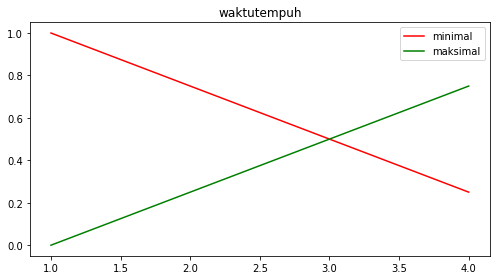

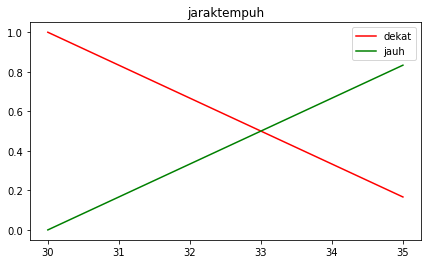

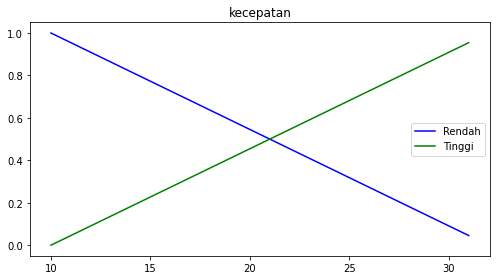

In [6]:
#Grafik 

#grafik waktu tempuh
x_waktutempuh = np.arange(1, 5, 1)

waktutempuh_kc = fuzz.trapmf(x_waktutempuh, [1, 1, 1, 5])
waktutempuh_bs = fuzz.trapmf(x_waktutempuh, [1, 5, 5, 5])

fig, ax = plt.subplots(nrows=1, figsize=(7, 4))

ax.plot(x_waktutempuh, waktutempuh_kc, 'r', linewidth=1.5, label='minimal')
ax.plot(x_waktutempuh, waktutempuh_bs, 'g', linewidth=1.5, label='maksimal')

ax.set_title('waktutempuh')
ax.legend()

plt.tight_layout()

#grafik jarak tempuh

x_jaraktempuh = np.arange(30, 36, 1)

jaraktempuh_lb = fuzz.trapmf(x_jaraktempuh, [30, 30, 30, 36])
jaraktempuh_cp = fuzz.trapmf(x_jaraktempuh, [30, 36, 36, 36])
fig, ax = plt.subplots(nrows=1, figsize=(7, 4))

ax.plot(x_jaraktempuh, jaraktempuh_lb, 'r', linewidth=1.5, label='dekat')
ax.plot(x_jaraktempuh, jaraktempuh_cp, 'g', linewidth=1.5, label='jauh')

ax.set_title('jaraktempuh')
ax.legend()

plt.tight_layout

#grafik kecepatan

x_kecepatan = np.arange(10, 32, 1)

kecepatan_rd = fuzz.trapmf(x_kecepatan, [10, 10, 10, 32])
kecepatan_tg = fuzz.trapmf(x_kecepatan, [10, 32, 32, 32])

fig, ax = plt.subplots(nrows=1, figsize=(7, 4))

ax.plot(x_kecepatan, kecepatan_rd, 'b', linewidth=1.5, label='Rendah')
ax.plot(x_kecepatan, kecepatan_tg, 'g', linewidth=1.5, label='Tinggi')

ax.set_title('kecepatan')
ax.legend()

plt.tight_layout()

In [7]:
#fuzzyfikasi
#membuat rumus

def turun(b,a,x):
    if(x<=a):
        nilai = 1
    elif(x>a and x<b):
        nilai = (b-x)/(b-a)
    elif(x>=b):
        nilai = 0

    return nilai

def naik(b,a,x):
    if(x<=a):
        nilai = 0
    elif(x>a and x<b):
        nilai = (x-a)/(b-a)
    elif(x>=b):
        nilai = 1

    return nilai

def agregasi_turun(b,a,alfa):
    nilai = b - (alfa*(b-a))
    return nilai

def agregasi_naik(b,a,alfa):
    nilai = alfa*(b-a) + a
    return nilai

#input jumlah dan nama variabel
var = int(input("Jumlah variabel: "))

nama_var = []
for i in range(var):
    nama = input("Sebutkan nama variabel: ")
    nama_var.append(nama)

Jumlah variabel: 3
Sebutkan nama variabel: waktutempuh
Sebutkan nama variabel: jaraktempuh
Sebutkan nama variabel: kecepatankapal


In [9]:
#input nilai tertinggi dan terendah
variabel = dict()
for i in nama_var:
    print(i)
    up = int(input("naik : "))
    down = int(input("turun : "))
    variabel.update({i+"_naik":up})
    variabel.update({i+"_turun":down})
    
print(variabel)

waktutempuh
naik : 5
turun : 1
jaraktempuh
naik : 36
turun : 30
kecepatankapal
naik : 32
turun : 10
{'waktutempuh_naik': 5, 'waktutempuh_turun': 1, 'jaraktempuh_naik': 36, 'jaraktempuh_turun': 30, 'kecepatankapal_naik': 32, 'kecepatankapal_turun': 10}


In [10]:
#input soal

soal = dict()

jml = int(input("Jumlah variabel yang diketahui : "))

for i in range(jml):
    ver = input("Nama variabel : ")
    val = int(input("Nilai : "))   
    soal.update({ver:val})
    
print(soal)

dit = input("Variabel yang ditanyakan : ")

Jumlah variabel yang diketahui : 2
Nama variabel : waktutempuh
Nilai : 4
Nama variabel : jaraktempuh
Nilai : 35
{'waktutempuh': 4, 'jaraktempuh': 35}
Variabel yang ditanyakan : kecepatankapal


In [11]:
#menghitung fuzzyfikasi
nk = dict()
for i in soal:
    up = naik(variabel[i+"_naik"],variabel[i+"_turun"],soal[i])
    down = turun(variabel[i+"_naik"],variabel[i+"_turun"],soal[i])
    nk.update({i+"_naik":up})
    nk.update({i+"_turun":down})

print(nk)

{'waktutempuh_naik': 0.75, 'waktutempuh_turun': 0.25, 'jaraktempuh_naik': 0.8333333333333334, 'jaraktempuh_turun': 0.16666666666666666}


In [13]:
#menghitung rules
alfa = []
z = []

r = int(input("Masukkan jumlah peraturan : "))

for i in range(r):
    kondisi1 = input("Kondisi 1(naik/turun): ")
    kondisi2 = input("Kondisi 2(naik/turun): ")
    kesimpulan = input("Kesimpulan(naik/turun): ")
    #Fire Strength INTERSEKSI (AND)
    a = min(nk[kondisi1],nk[kondisi2]) 
    alfa.append(a)
    if(kesimpulan == "turun"):
        zz = agregasi_turun(variabel[dit+"_naik"],variabel[dit+"_turun"],a)
    elif(kesimpulan == "naik"):
        zz = agregasi_naik(variabel[dit+"_naik"],variabel[dit+"_turun"],a)        
    z.append(zz)

Masukkan jumlah peraturan : 4
Kondisi 1(naik/turun): waktutempuh_turun
Kondisi 2(naik/turun): jaraktempuh_naik
Kesimpulan(naik/turun): turun
Kondisi 1(naik/turun): waktutempuh_turun
Kondisi 2(naik/turun): jaraktempuh_turun
Kesimpulan(naik/turun): turun
Kondisi 1(naik/turun): waktutempuh_naik
Kondisi 2(naik/turun): jaraktempuh_naik
Kesimpulan(naik/turun): naik
Kondisi 1(naik/turun): waktutempuh_naik
Kondisi 2(naik/turun): jaraktempuh_turun
Kesimpulan(naik/turun): naik


In [14]:
#predikat
print(alfa)

#hasil hitungan
print(z)

[0.25, 0.16666666666666666, 0.75, 0.16666666666666666]
[26.5, 28.333333333333332, 26.5, 13.666666666666666]


In [15]:
#DEFUZIFIKASI
df = 0

for i in range(len(alfa)):
    df += alfa[i]*z[i]

defuz = int(df/sum(alfa))

print("Jadi, nilai ",dit," adalah ",defuz)

Jadi, nilai  kecepatankapal  adalah  25
